In [133]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

In [36]:
df=pd.read_csv("car_price_prediction_with_missing.csv")

In [6]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X
1,2.0,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series
2,3.0,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4
3,4.0,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y
4,5.0,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang


In [13]:
df.to_excel("car_price_prediction_with_missing.xlsx")

In [37]:
df.shape

(2500, 10)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2250 non-null   float64
 1   Brand         2250 non-null   str    
 2   Year          2250 non-null   float64
 3   Engine Size   2250 non-null   float64
 4   Fuel Type     2250 non-null   str    
 5   Transmission  2250 non-null   str    
 6   Mileage       2250 non-null   float64
 7   Condition     2250 non-null   str    
 8   Price         2250 non-null   float64
 9   Model         2250 non-null   str    
dtypes: float64(5), str(5)
memory usage: 195.4 KB


In [9]:
df.isnull().sum()

Car ID          250
Brand           250
Year            250
Engine Size     250
Fuel Type       250
Transmission    250
Mileage         250
Condition       250
Price           250
Model           250
dtype: int64

In [38]:
df=df.drop(columns=['Car ID']   )

In [39]:
df=df.dropna()

In [40]:
df.shape

(2250, 9)

In [41]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X
1,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series
2,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4
3,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y
4,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang


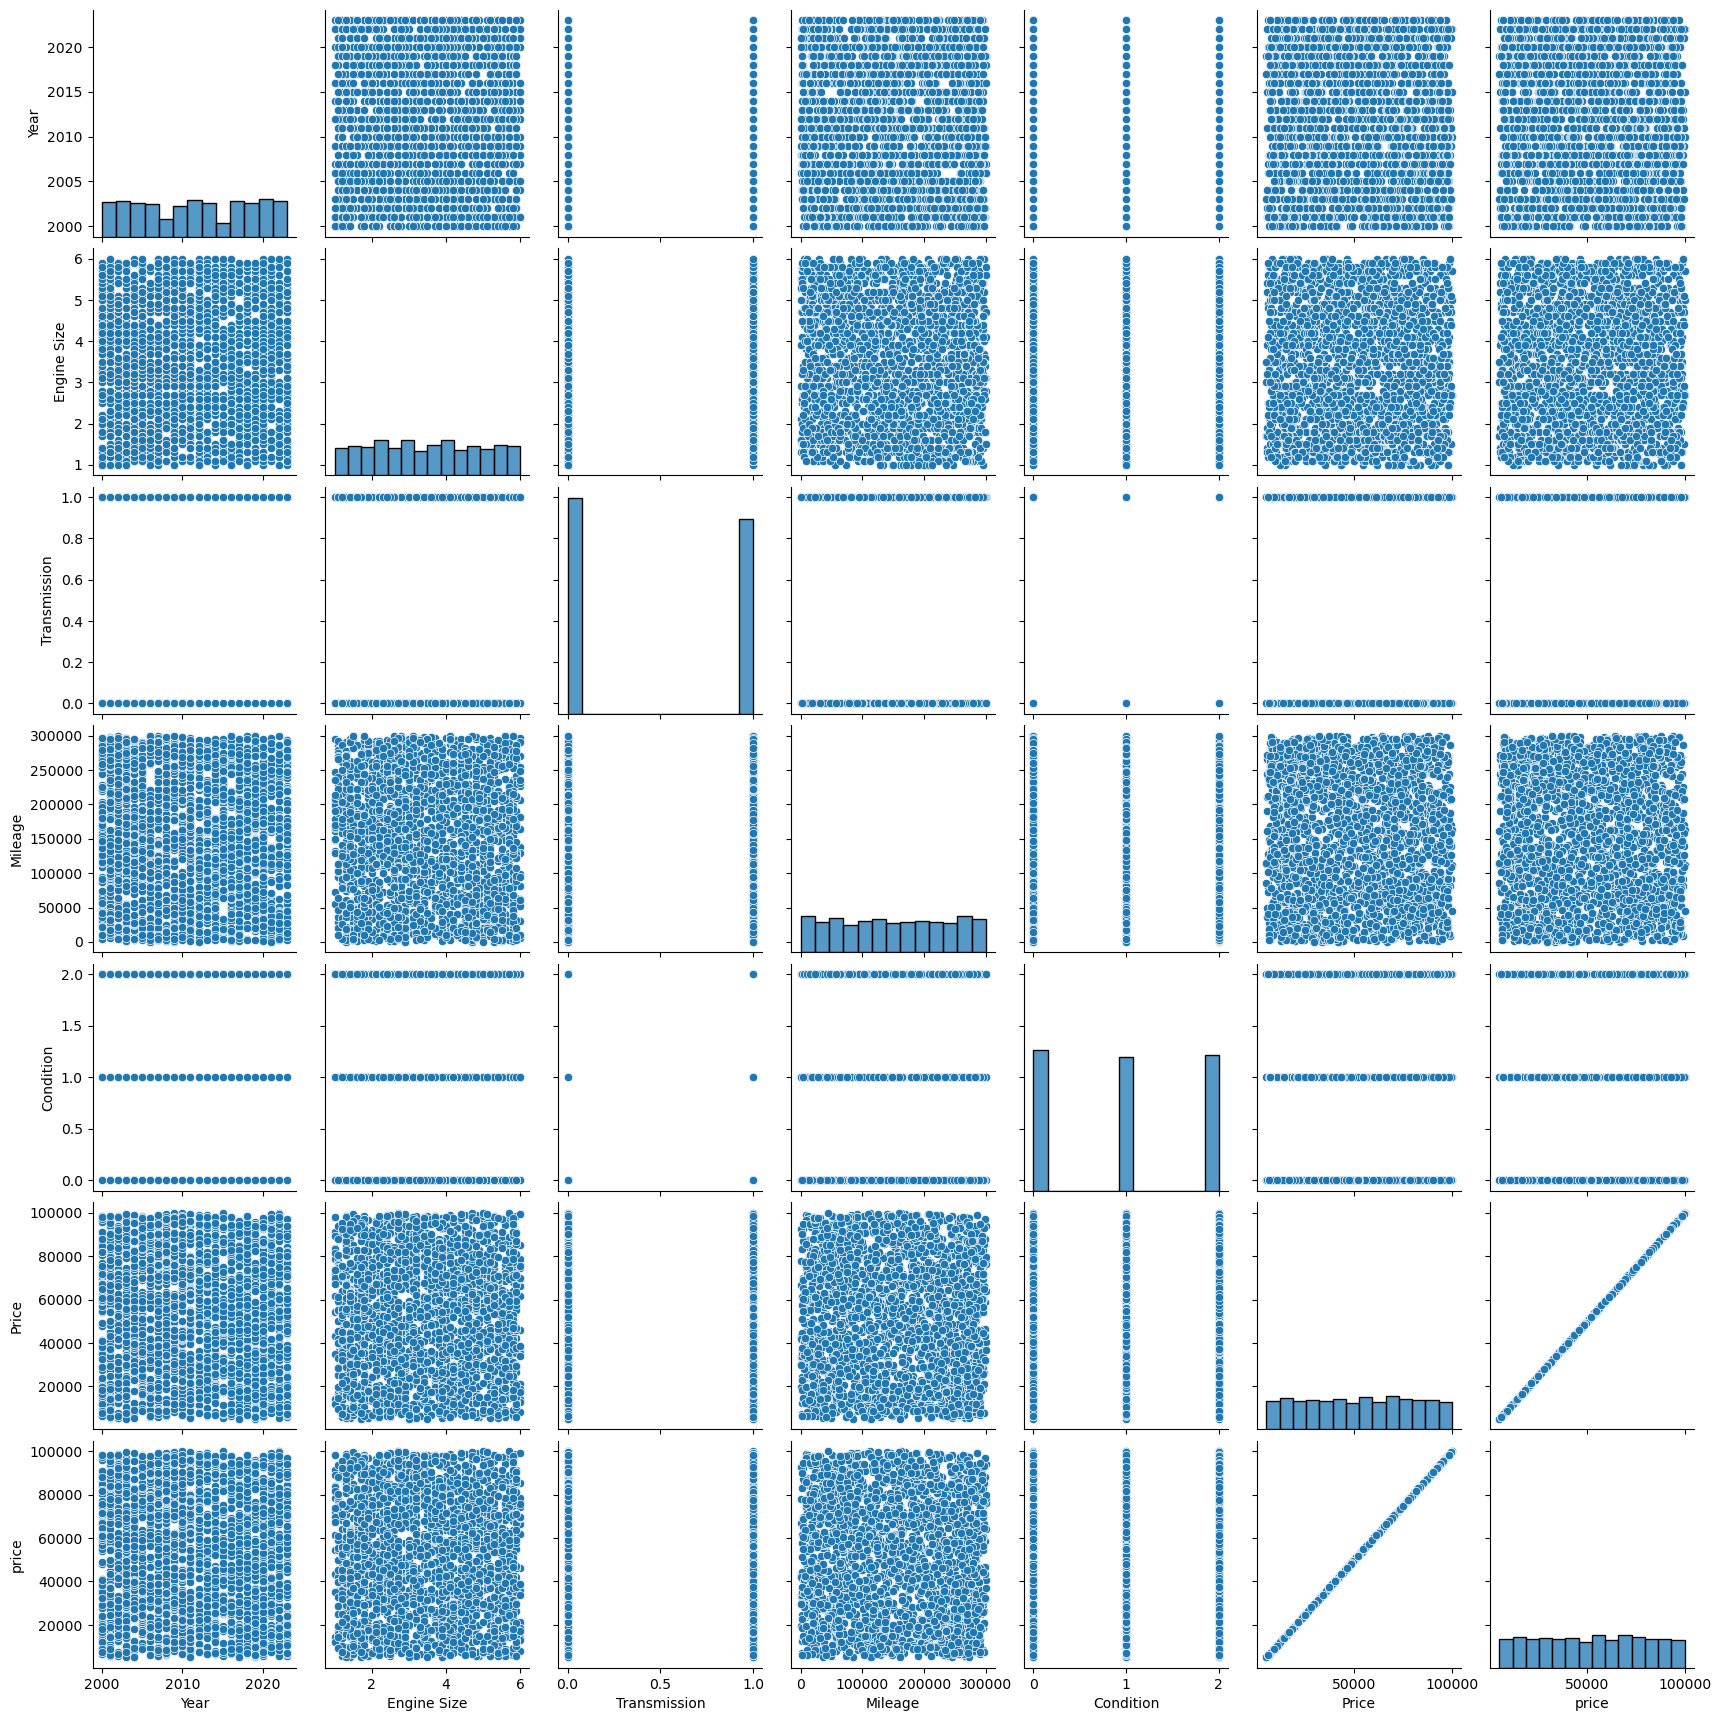

In [137]:
sns.pairplot(df)

<Axes: xlabel='Mileage', ylabel='Price'>

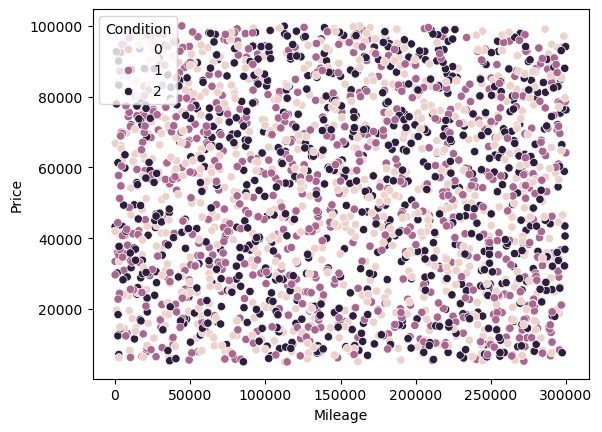

In [ ]:
sns.scatterplot(x='Mileage',y='Price',hue='Condition',data=df)

<Axes: xlabel='Year', ylabel='Price'>

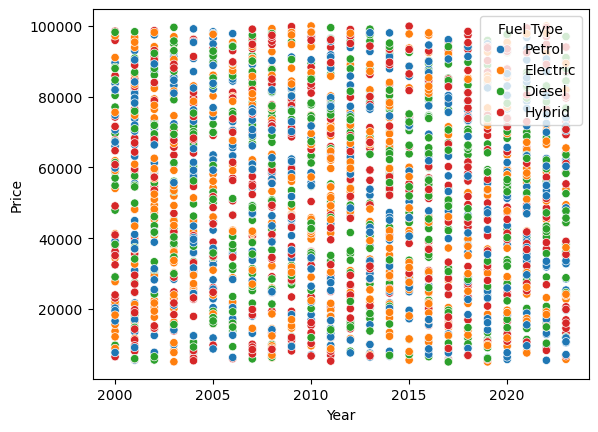

In [141]:
sns.scatterplot(x='Year',y='Price',hue='Fuel Type',data=df)

<Axes: xlabel='Engine Size', ylabel='Price'>

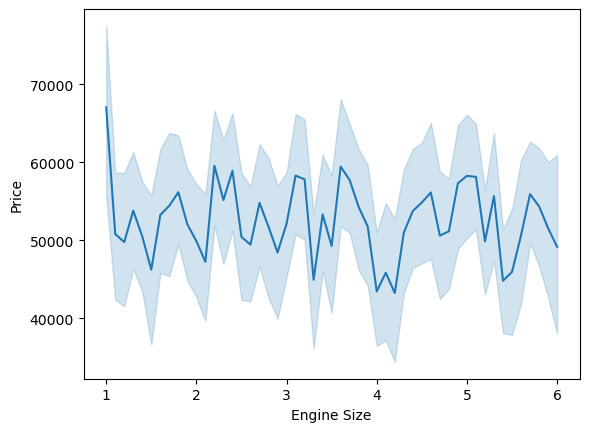

In [146]:
sns.lineplot(x='Engine Size',y='Price',data=df)

In [42]:
df.Brand.value_counts()

Brand
Toyota      346
Mercedes    331
BMW         326
Audi        323
Tesla       314
Ford        307
Honda       303
Name: count, dtype: int64

In [43]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel      587
Petrol      561
Electric    554
Hybrid      548
Name: count, dtype: int64

In [44]:
df['Transmission'].value_counts()

Transmission
Manual       1184
Automatic    1066
Name: count, dtype: int64

In [48]:
df['Transmission']=df['Transmission'].map({'Manual':0,'Automatic':1})

In [49]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016.0,2.3,Petrol,0,114832.0,New,26613.92,Model X
1,BMW,2018.0,4.4,Electric,0,143190.0,Used,14679.61,5 Series
2,Audi,2013.0,4.5,Electric,0,181601.0,New,44402.61,A4
3,Tesla,2011.0,4.1,Diesel,1,68682.0,New,86374.33,Model Y
4,Ford,2009.0,2.6,Diesel,0,223009.0,Like New,73577.10,Mustang


In [30]:
df['Condition'].value_counts()

Condition
Used        769
Like New    746
New         735
Name: count, dtype: int64

In [50]:
df['Condition']=df['Condition'].map({'New':1,'Like New':2,'Used':0})

In [31]:
df['Model'].value_counts()

Model
Corolla     97
A4          88
Fiesta      88
Prius       88
GLA         87
A3          87
C-Class     87
Model X     86
3 Series    86
5 Series    83
Model Y     83
X3          83
E-Class     83
RAV4        83
Q7          81
CR-V        79
Accord      79
Fit         79
Camry       78
Explorer    76
Model 3     76
X5          74
GLC         74
Mustang     73
Focus       70
Model S     69
Q5          67
Civic       66
Name: count, dtype: int64

In [119]:
df.head(0)

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,price


In [120]:
tr1=ColumnTransformer(transformers=
[('Fuel Type impute',OneHotEncoder(),['Fuel Type'])]
,remainder='passthrough')

In [121]:
print(tr1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Fuel Type impute', OneHotEncoder(),
                                 ['Fuel Type'])])


In [122]:
tr2=ColumnTransformer(transformers=
[('brand_encoder',OneHotEncoder(),['Brand']),
('model_encoder',OneHotEncoder(),['Model'])]
,remainder='passthrough')

In [123]:
tr3=ColumnTransformer(transformers=
[('scaled',MinMaxScaler(),['Mileage','Engine Size','Year'])],
remainder='passthrough')

In [124]:
tr4=DecisionTreeRegressor()

In [125]:
pipe=make_pipeline(tr1,tr2,tr3,tr4)

In [126]:
# pipe=Pipeline([
#     ('Fuel Type imputer',tr1),
#     ('Categorical encoder',tr2),
#     ('Scaler',tr3),
#     ('Regressor',tr4)
# ])

In [127]:
df['price']=pd.to_numeric(df['Price'])

In [128]:
x=df.drop(columns=['Price'])
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [147]:
# pipe.fit(x_train,y_train)
# this will not excecute because of array


In [131]:
transform=ColumnTransformer(transformers=
[('Fuel Type impute',OneHotEncoder(),['Fuel Type']),
('brand_encoder',OneHotEncoder(),['Brand']),
('model_encoder',OneHotEncoder(),['Model']),
('scaled',MinMaxScaler(),['Mileage','Engine Size','Year'])]
,remainder='passthrough')

pipe2=make_pipeline(transform,DecisionTreeRegressor())

pipe2.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Fuel Type impute', ...), ('brand_encoder', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, d

In [132]:
y_pred=pipe2.predict(x_test)

In [ ]:
# acc=accuracy_score(y_test,y_pred)
# print("Accuracy:",acc)
acc2=r2_score(y_test,y_pred)
print("R2 Score:",acc2)
meanS=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",meanS)
meanA=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",meanA)

R2 Score: 0.9999880366398198
Mean Squared Error: 8712.461883111117
Mean Absolute Error: 65.29288888888875
